# Modelos Lineares

Modelos lineares são a base de muitos algoritmos de machine learning e formam o pilar fundamental para a compreensão de redes neurais mais complexas. A ideia central é que podemos modelar a relação entre um conjunto de variáveis de entrada (features) e uma variável de saída (alvo) através de uma combinação linear dessas entradas.

A simplicidade desses modelos os torna altamente interpretáveis e computacionalmente eficientes. Eles servem como um excelente ponto de partida para problemas de regressão (prever um valor contínuo) e classificação (prever uma categoria discreta).

Neste notebook, exploraremos dois dos modelos lineares mais importantes: a **Regressão Linear** e a **Regressão Logística**.

## Regressão Linear

A Regressão Linear é utilizada para prever um valor de saída contínuo, $y$, a partir de um conjunto de variáveis de entrada, $x$. O modelo assume que a relação entre a entrada e a saída é linear.

In [31]:
import torch
import numpy as np
import matplotlib.pyplot as plt

### Dataset Sintético

Geramos um conjunto simples de pontos para simular uma relação linear entre entrada e saída. Cada valor de entrada é criado a partir de uma distribuição uniforme, e o valor de saída é obtido aplicando uma transformação linear seguida de um pequeno ruído aleatório. Esse ruído impede que os pontos fiquem perfeitamente alinhados, tornando o problema mais realista.

In [32]:
# Gerando os dados de entrada (features)
num_points = 50
X_reg = torch.rand(num_points, 1) * 10

# Gerando os dados de saída (alvos) com base nos parâmetros e adicionando ruído
# y = w*X + b + ruído
noise = torch.randn(num_points, 1) * 5
y_reg = 2.5*X_reg + 1.5 + noise

print(f"Dimensão de X: {X_reg.shape}")
print(f"Dimensão de y: {y_reg.shape}")

Dimensão de X: torch.Size([50, 1])
Dimensão de y: torch.Size([50, 1])


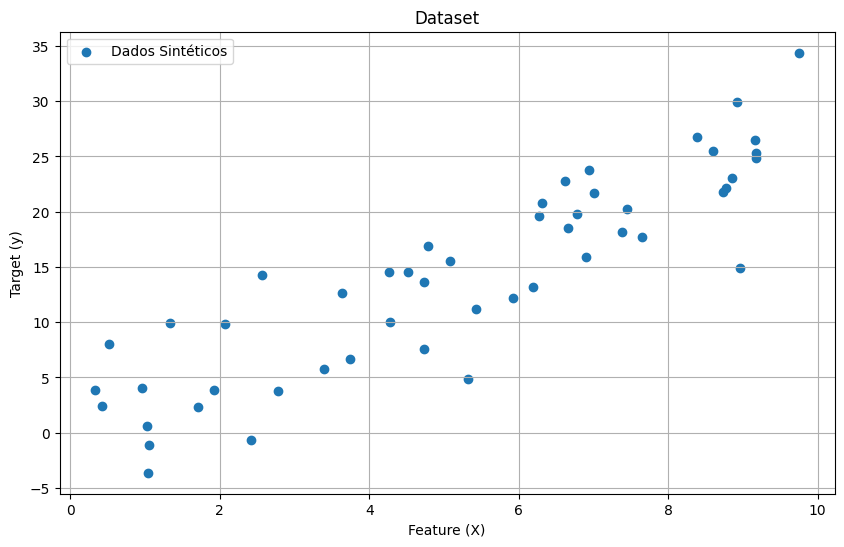

In [33]:
# Visualizando os dados gerados
plt.figure(figsize=(10, 6))
plt.scatter(X_reg.numpy(), y_reg.numpy(), label="Dados Sintéticos")
plt.title("Dataset")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.legend()
plt.grid(True)
plt.show()

### Definindo o Modelo

Para um único atributo (feature) $x$, a hipótese de um modelo de regressão linear é representada pela equação de uma reta:

$$ \hat{y} = w x + b $$

Onde:
- $\hat{y}$ é o valor previsto.
- $x$ é a variável de entrada.
- $w$ é o **peso** (weight), que corresponde ao coeficiente angular da reta (inclinação).
- $b$ é o **bias** (ou intercepto), que corresponde ao ponto onde a reta cruza o eixo y.

O objetivo do aprendizado é encontrar os valores ótimos de $w$ e $b$ que melhor se ajustam aos dados de treinamento.

Quando temos múltiplos atributos, $x_1, x_2, \dots, x_n$, a equação se generaliza para:

$$ \hat{y} = w_1 x_1 + w_2 x_2 + \dots + w_n x_n + b $$

In [34]:
import torch.nn as nn

reg_model = nn.Linear(1, 1)

In [35]:
# Os parâmetros (peso e bias) são inicializados aleatoriamente
print("Parâmetros iniciais (aleatórios):")
for name, param in reg_model.named_parameters():
    if param.requires_grad:
        print(f"{name}: {param.data}")

Parâmetros iniciais (aleatórios):
weight: tensor([[-0.6123]])
bias: tensor([-0.1521])


### Função de Custo: Erro Quadrático Médio (MSE)

Para a regressão linear, a função de custo mais comum é o **Erro Quadrático Médio** (Mean Squared Error - MSE). Ela calcula a média dos quadrados das diferenças entre as previsões e os valores reais.

A fórmula para o MSE, para um conjunto de $m$ exemplos de treinamento, é:

$$ J(w, b) = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})^2 $$

Onde:
- $\hat{y}^{(i)} = w x^{(i)} + b$ é a previsão para o $i$-ésimo exemplo.
- $y^{(i)}$ é o valor real para o $i$-ésimo exemplo.

In [36]:
# Usamos o MSELoss já implementado no PyTorch
loss_function = nn.MSELoss()

### Gradiente Descendente Estocástico (SGD)

O Gradiente Descendente é um algoritmo de otimização iterativo que busca minimizar a função de custo ajustando gradualmente os parâmetros do modelo. A ideia é "descer a colina" da função de custo, dando passos na direção do gradiente negativo.

A regra de atualização para cada parâmetro (seja $w$ ou $b$) é:

$$ \theta_{novo} = \theta_{antigo} - \eta \nabla J(\theta) $$

Onde:
- $\theta$ representa um parâmetro do modelo ($w$ ou $b$).
- $\eta$ (eta) é a **taxa de aprendizado** (learning rate), um hiperparâmetro que controla o tamanho do passo que damos a cada iteração.
- $\nabla J(\theta)$ é o gradiente da função de custo em relação ao parâmetro $\theta$.

In [37]:
# Usamos o SGD, passando os parâmetros do modelo e a taxa de aprendizado
optimizer = torch.optim.SGD(reg_model.parameters(), lr=0.001)

### Treinamento

Durante o treinamento, o modelo realiza previsões, calcula o erro usando o MSE e ajusta os parâmetros por meio do gradiente. A cada época, repetimos esse ciclo para aproximar os valores ideais de peso e bias. Ao longo das iterações, esperamos observar uma redução progressiva da função de custo, indicando que o modelo está se ajustando aos dados.

Epoch 0: loss = 418.9709
Epoch 10: loss = 106.6140
Epoch 20: loss = 36.9016
Epoch 30: loss = 21.3427
Epoch 40: loss = 17.8698


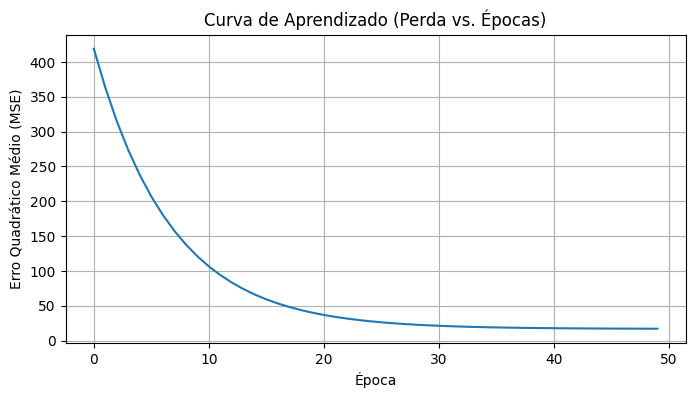

In [38]:
losses = []
epochs = 50

for epoch in range(epochs):
    y_pred = reg_model(X_reg)
    loss = loss_function(y_pred, y_reg)
    losses.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: loss = {loss.item():.4f}")

# Plot da Curva de Perda
plt.figure(figsize=(8, 4))
plt.plot(range(epochs), losses)
plt.title("Curva de Aprendizado (Perda vs. Épocas)")
plt.xlabel("Época")
plt.ylabel("Erro Quadrático Médio (MSE)")
plt.grid(True)
plt.show()

In [39]:
# Imprimindo os parâmetros aprendidos
print("Parâmetros aprendidos pelo modelo:")
for name, param in reg_model.named_parameters():
    if param.requires_grad:
        print(f"{name}: {param.data.numpy()}")

Parâmetros aprendidos pelo modelo:
weight: [[2.612034]]
bias: [0.3138996]


### Inferência

Com os parâmetros ajustados, utilizamos o modelo para gerar previsões. Na inferência, apenas alimentamos o modelo com novos valores de entrada e coletamos o resultado da equação aprendida. O objetivo é verificar se a reta ajustada realmente captura o comportamento do conjunto de dados e se consegue generalizar para valores não vistos durante o treinamento.

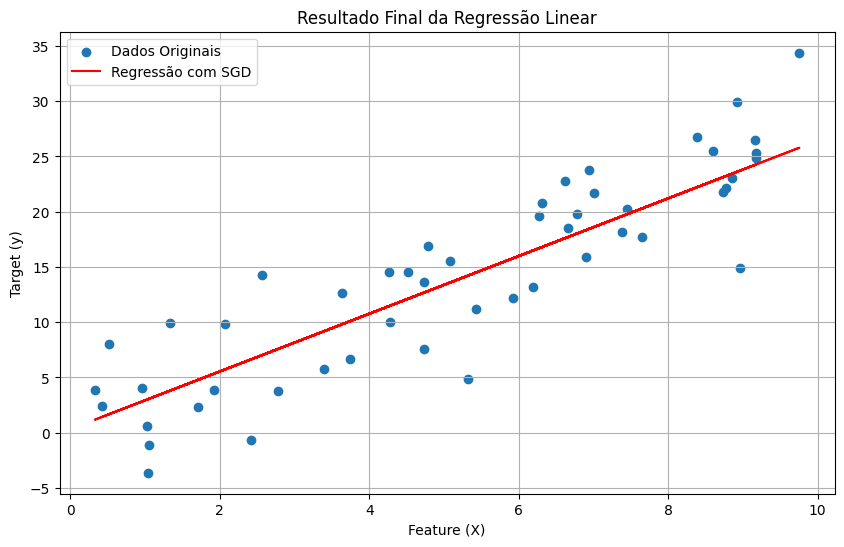

In [40]:
# Colocando o modelo em modo de avaliação
reg_model.eval()

# Fazendo previsões com o modelo treinado
with torch.no_grad(): # Desabilita o cálculo de gradientes para inferência
    predicted = reg_model(X_reg).detach().numpy()

# Visualizando o resultado final
plt.figure(figsize=(10, 6))
plt.scatter(X_reg.numpy(), y_reg.numpy(), label="Dados Originais")
plt.plot(X_reg.numpy(), predicted, color='r', label="Regressão com SGD")
plt.title("Resultado Final da Regressão Linear")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.legend()
plt.grid(True)
plt.show()

In [41]:
# Exemplo de inferência para um novo ponto
new_x = torch.tensor([[30.0]]) # Um novo valor de X

with torch.no_grad():
    new_y = reg_model(new_x)

print(f"Previsão para X = {new_x.item():.1f} -> y = {new_y.item():.4f}")

Previsão para X = 30.0 -> y = 78.6749


## Regressão Logística

Enquanto a regressão linear é usada para prever valores contínuos, a **Regressão Logística** é usada para problemas de **classificação**, onde o objetivo é prever uma categoria discreta (por exemplo, 0 ou 1, "sim" ou "não", "gato" ou "cachorro").

Apesar do nome "regressão", é um modelo de classificação. Ele adapta o modelo linear para produzir uma probabilidade, que pode ser então usada para determinar a classe.

### Dataset Sintético

Criamos um conjunto de pontos em duas dimensões, separáveis linearmente, para ilustrar a classificação binária. Cada amostra pertence a uma das duas classes, e usamos o `make_classification` para gerar dados com separação limpa entre as categorias. Assim como na regressão, esse cenário simples nos permite visualizar a fronteira de decisão aprendida pelo modelo.

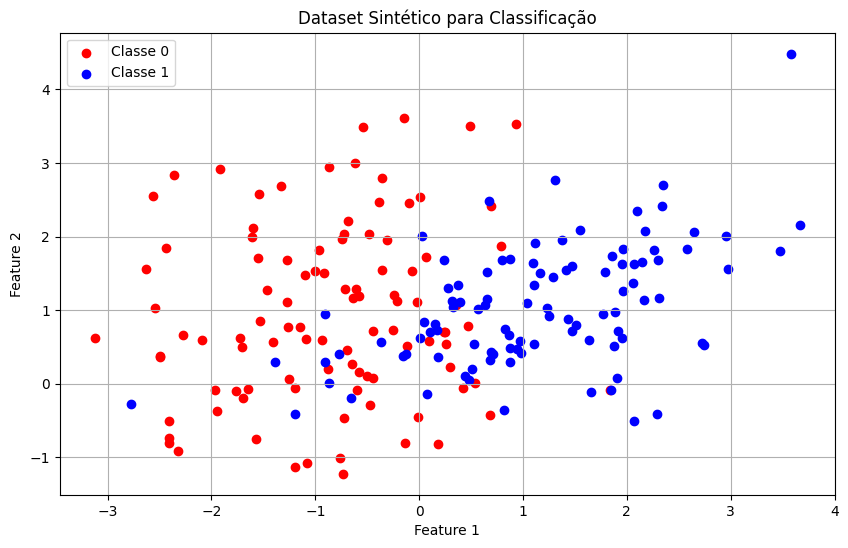

In [42]:
# Geração de Dados Sintéticos para Classificação
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Gerando um dataset linearmente separável
X_clf, y_clf = make_classification(
    n_samples=200,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42
)

# Convertendo para tensores do PyTorch
X_clf = torch.from_numpy(X_clf).float()
y_clf = torch.from_numpy(y_clf).float().view(-1, 1) # Redimensiona para (200, 1)

# Visualizando os dados
plt.figure(figsize=(10, 6))
plt.scatter(X_clf[y_clf.squeeze() == 0][:, 0], X_clf[y_clf.squeeze() == 0][:, 1], color="red", label="Classe 0")
plt.scatter(X_clf[y_clf.squeeze() == 1][:, 0], X_clf[y_clf.squeeze() == 1][:, 1], color="blue", label="Classe 1")
plt.title("Dataset Sintético para Classificação")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

### Modelo

Para transformar a saída de um modelo linear (que pode ser qualquer valor real) em uma probabilidade (um valor entre 0 e 1), usamos uma **função de ativação**. Para a Regressão Logística, a função utilizada é a **Sigmoid** (ou função logística).

A função Sigmoid é definida como:

$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$

Onde $z$ é a saída do modelo linear ($z = \mathbf{w}^T \mathbf{x} + b$).

- Se $z$ for muito grande e positivo, $e^{-z}$ se aproxima de 0, e $\sigma(z)$ se aproxima de 1.
- Se $z$ for muito grande e negativo, $e^{-z}$ se aproxima do infinito, e $\sigma(z)$ se aproxima de 0.
- Se $z = 0$, $\sigma(z) = 0.5$.

A saída $\sigma(z)$ pode ser interpretada como a probabilidade de a amostra pertencer à classe positiva (classe 1).
$$ \hat{p} = P(y=1 | \mathbf{x}) = \sigma(\mathbf{w}^T \mathbf{x} + b) $$

In [43]:
clf_model = nn.Sequential(
    nn.Linear(2, 1),
    nn.Sigmoid()
)

In [44]:
# Os parâmetros (peso e bias) são inicializados aleatoriamente
print("Parâmetros iniciais (aleatórios):")
for name, param in clf_model.named_parameters():
    if param.requires_grad:
        print(f"{name}: {param.data}")

Parâmetros iniciais (aleatórios):
0.weight: tensor([[ 0.2122, -0.2852]])
0.bias: tensor([-0.0982])


### Entropia Cruzada Binária (Log-Loss)

Para problemas de classificação, o MSE não é uma boa escolha, pois a função de custo pode se tornar não-convexa, dificultando a otimização. Em vez disso, usamos a **Entropia Cruzada Binária** (Binary Cross-Entropy), também conhecida como **Log-Loss**.

Essa função penaliza fortemente as previsões que estão confiantes e erradas. Para $m$ exemplos, a função de custo é a média das perdas individuais:

$$ J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(\hat{p}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{p}^{(i)})] $$

Onde:
- $y$ é o rótulo verdadeiro (0 ou 1).
- $\hat{p}$ é a probabilidade prevista para a classe 1 ($\sigma(z)$).

In [45]:
# BCELoss: Binary Cross Entropy Loss
loss_function_clf = nn.BCELoss()

In [46]:
# Usamos o SGD, passando os parâmetros do modelo e a taxa de aprendizado
optimizer_clf = torch.optim.SGD(clf_model.parameters(), lr=0.1)

Epoch 0: loss = 0.6254
Epoch 10: loss = 0.4950
Epoch 20: loss = 0.4462
Epoch 30: loss = 0.4217
Epoch 40: loss = 0.4070


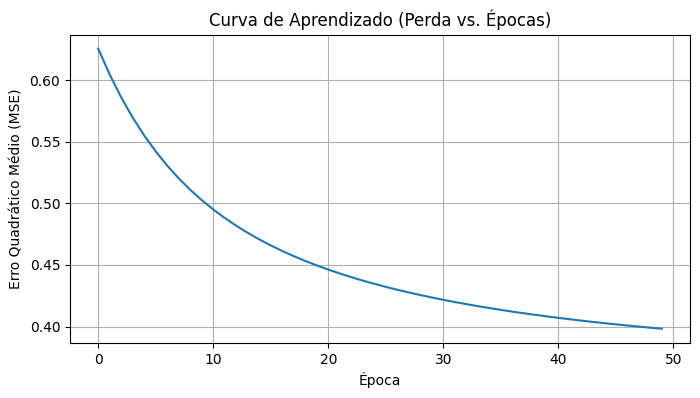

In [47]:
losses = []
epochs = 50

for epoch in range(epochs):
    y_pred = clf_model(X_clf)
    loss = loss_function_clf(y_pred, y_clf)
    losses.append(loss.item())

    optimizer_clf.zero_grad()
    loss.backward()
    optimizer_clf.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: loss = {loss.item():.4f}")

# Plot da Curva de Perda
plt.figure(figsize=(8, 4))
plt.plot(range(epochs), losses)
plt.title("Curva de Aprendizado (Perda vs. Épocas)")
plt.xlabel("Época")
plt.ylabel("Erro Quadrático Médio (MSE)")
plt.grid(True)
plt.show()

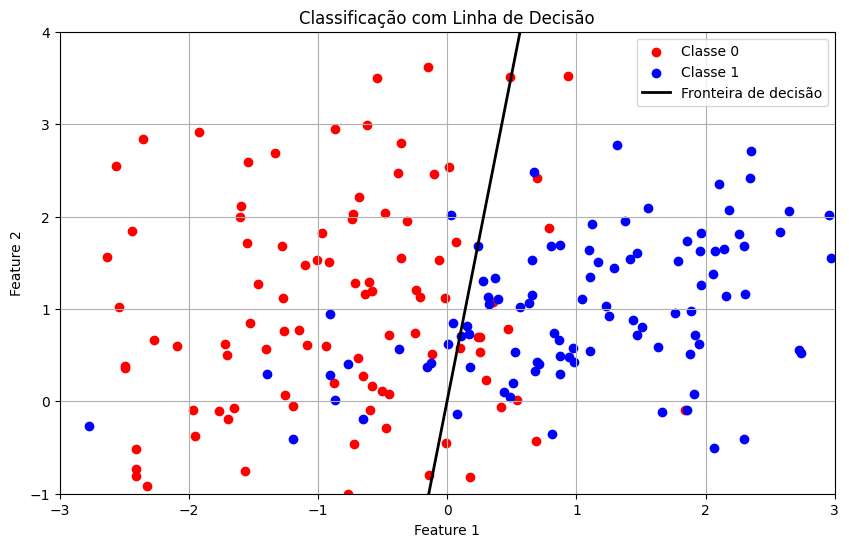

In [48]:
# Plot dos pontos
plt.figure(figsize=(10, 6))
plt.scatter(X_clf[y_clf.squeeze() == 0][:, 0], X_clf[y_clf.squeeze() == 0][:, 1], color="red", label="Classe 0")
plt.scatter(X_clf[y_clf.squeeze() == 1][:, 0], X_clf[y_clf.squeeze() == 1][:, 1], color="blue", label="Classe 1")

# Extrair pesos e bias do modelo treinado
w = clf_model[0].weight.detach().numpy().squeeze()   # shape (2,)
b = clf_model[0].bias.detach().numpy().item()

# A fronteira de decisão do sigmoid é: w1*x1 + w2*x2 + b = 0
# Então: x2 = -(w1*x1 + b) / w2
x_vals = np.linspace(-3, 3, 200)
y_vals = -(w[0] * x_vals + b) / w[1]

# Plotar linha de decisão
plt.plot(x_vals, y_vals, color="black", linewidth=2, label="Fronteira de decisão")

plt.title("Classificação com Linha de Decisão")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.xlim(-3, 3)
plt.ylim(-1, 4)
plt.legend()
plt.grid(True)
plt.show()